<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

5. Make sure to modify the plot learning curve code to incorporate apprioparite metric. The default is accuracy which may noit be a good choice.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. No need to submit the pdf version.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

# Mount drive and Import Libraries

In [135]:
# Commom Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

# Pathing Imports
import joblib
import sys
from pathlib import Path

# Imports for Model Training
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split#, plot_learning_curve

# Working with Sparse Metrices
from scipy.sparse import csr_matrix
warnings.filterwarnings('ignore')

In [136]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !python -m spacy download en_core_web_sm -qq

    basepath = '/content/drive/MyDrive/NLP(Sem-3)/Homework/Data'
    sys.path.append('/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2')
else:
    basepath = '/content/drive/MyDrive/NLP(Sem-3)/Homework/Data'
    sys.path.append(
        '/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [137]:
import CustomPreprocessorSpacy as cp
from FeaturizerSpacy import ManualFeatures
from plot_learning_curve import plot_learning_curve

# Q1

## Load Dataset

In [138]:
data=pd.read_csv('/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Data/assignment_2.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [139]:
data=data[['v1', 'v2']].rename(columns={'v1': 'Label', 'v2': 'Message'})
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [140]:
value_counts = data['Label'].value_counts()
percentages = (value_counts / len(data)) * 100
print(percentages)

Label
ham     86.593683
spam    13.406317
Name: count, dtype: float64


# Q2

## Metrics

Precision:
Recall: It is important when the minority class is critical, and want to ensure that the model captures as many of these instances as possible. As here the recall value helps us tell whether the
F1-Score:

# Q-3

# Data Partition

In [141]:
data_sample=data.sample(frac=0.1, random_state=42)
data_sample.head()

,Label,Message
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,ham,I sent my scores to sophas and i had to do sec...
1044,spam,We know someone who you know that fancies you....
2484,ham,Only if you promise your getting out as SOON a...
812,spam,Congratulations ur awarded either å£500 of CD ...


In [142]:
data_sample.shape

(557, 2)

In [143]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 3245 to 2836
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    557 non-null    object
 1   Message  557 non-null    object
dtypes: object(2)
memory usage: 13.1+ KB


In [144]:
data_sample['Label'].value_counts()

,count
Label,
ham,490
spam,67


In [239]:
data_sample['Label'] = data_sample['Label'].replace({'ham': 1, 'spam': 0})

# Train_Test_Split

In [240]:
X=data_sample['Message']
y=data_sample['Label']

In [241]:
y.value_counts()

,count
Label,
2,557


In [147]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [148]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373,), (184,), (373,), (184,))

In [149]:
X_train.head()

,Message
5174,Water logging in desert. Geoenvironmental impl...
4418,How have your little darlings been so far this...
2726,No i am not having not any movies in my laptop
553,Ok. Every night take a warm bath drink a cup o...
2480,Urgent! call 09066612661 from landline. Your c...


In [150]:
X_test.head()

,Message
3307,But i'm surprised she still can guess right lo...
2842,"Tunji, how's the queen? how are you doing. Thi..."
3103,That's y i said it's bad dat all e gals know u...
3570,But you dint in touch with me.
4500,So wat's da decision?


In [151]:
y_train.head()

,Label
5174,1
4418,1
2726,1
553,1
2480,0


In [227]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 373 entries, 5174 to 3785
Series name: Label
Non-Null Count  Dtype
--------------  -----
373 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB


In [225]:
y_test.head()

,Label
3307,1
2842,1
3103,1
3570,1
4500,1


In [226]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 184 entries, 3307 to 4071
Series name: Label
Non-Null Count  Dtype
--------------  -----
184 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [152]:
X_train_bow = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_train.tolist())

In [153]:
X_train_bow[:5]

['water log desert geoenvironmental implication',
 "little darling far week need coffee run tomo?can't believe time week \x89û",
 'have movie laptop',
 'ok night warm bath drink cup milk work magic need loose weight know',
 'urgent 09066612661 landline complementary 4 tenerife holiday å£10,000 cash await collection sae t&c po box 3 wa14 2px 150ppm 18 + sender hol offer']

In [154]:
file_X_train_cleaned_bow = '/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/x_train_cleaned_bow_small.pkl'
joblib.dump(X_train_bow, file_X_train_cleaned_bow)

['/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/x_train_cleaned_bow_small.pkl']

In [155]:
X_test_bow = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_test.tolist())

In [156]:
file_X_test_cleaned_bow = '/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/x_test_cleaned_bow_small.pkl'
joblib.dump(X_test_bow, file_X_test_cleaned_bow)

['/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/x_test_cleaned_bow_small.pkl']

# Pipelines

## Sparse Embedding

In [173]:
classifier_1=Pipeline([('tfidf', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")), ('classifier', xgb.XGBClassifier(random_state= 42))])

In [174]:
param_grid_classifier_1 = {'tfidf__max_features': [1000, 2000, 5000],
                           'tfidf__max_df': [0.2, 0.4, 0.6, 0.8, 1.0],
                           'tfidf__min_df': [1, 3, 5, 10],
                           'tfidf__ngram_range': [(1, 1), (1, 2)],
                           'classifier__max_depth': [3, 6, 9],
                           'classifier__learning_rate':[0.1, 0.01, 0.001],
                           'classifier__n_estimators':[10, 1000, 10000]
                           }

In [175]:
grid_classifier_1 = HalvingGridSearchCV(estimator=classifier_1, param_grid=param_grid_classifier_1,factor=2, scoring='accuracy', error_score='raise', cv=3)

In [176]:
X_train_bow_path='/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/x_train_cleaned_bow_small.pkl'
X_train_bow= joblib.load(X_train_bow_path)

In [180]:
grid_classifier_1.fit(X_train_bow, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]

In [ ]:
with open('/content/drive/MyDrive/NLP(Sem-3)/Homework/Data/sparse_embedding.pkl', 'wb') as f:
    pickle.dump(grid_classifier_1, f)

In [ ]:
print(f'Best cross-validation score: {grid_classifier_1.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_1.best_params_)
print("\nBest estimator: ", grid_classifier_1.best_estimator_)

In [218]:
def final_pipeline_clf1(text):
    best_estimator_pipeline1_round1 = grid_classifier_1.best_estimator_
    predictions = best_estimator_pipeline1_round1.predict(text)
    return predictions

In [219]:
y_test_pred_clf1 = final_pipeline_clf1(X_test_cleaned)

NameError: name 'X_test_cleaned' is not defined

In [ ]:
print('\nTest set classification report:\n\n', classification_report(y_test, y_test_pred))

In [ ]:
# plot_learning_curve

## Feature Engineering

In [181]:
X_train_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_train.tolist())

In [182]:
file_X_train_cleaned_basic ='/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/x_train_cleaned_basic_small.pkl'
joblib.dump(X_train_basic, file_X_train_cleaned_basic)

['/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/x_train_cleaned_basic_small.pkl']

In [183]:
X_test_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_test.tolist())

In [184]:
file_X_test_cleaned_basic ='/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/x_test_cleaned_basic_small.pkl'
joblib.dump(X_test_basic, file_X_test_cleaned_basic)

['/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/x_test_cleaned_basic_small.pkl']

In [185]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm', batch_size = 1000)

In [186]:
X_train_cleaned_basic = joblib.load(file_X_train_cleaned_basic)

In [220]:
X_test_cleaned_basic = joblib.load(file_X_test_cleaned_basic)

In [187]:
X_train_features, feature_names = featurizer.fit_transform(X_train_cleaned_basic)

In [221]:
X_test_features, feature_names = featurizer.fit_transform(X_test_cleaned_basic)

In [188]:
X_train_features[0:3]

array([[  6.        ,  55.        ,  50.        ,   7.14285714,
          0.        ,   2.        ,   3.        ,   0.        ,
          1.        ,   1.        ,   0.        ],
       [ 24.        , 124.        , 102.        ,   4.08      ,
          0.        ,   2.        ,   8.        ,   4.        ,
          1.        ,   1.        ,   1.        ],
       [ 11.        ,  46.        ,  36.        ,   3.        ,
          0.        ,   1.        ,   2.        ,   1.        ,
          1.        ,   0.        ,   0.        ]])

In [189]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_numbers',
 'count_sentences',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

In [190]:
classifier_2 = Pipeline([
     ('classifier', xgb.XGBClassifier(random_state= 42))])

In [191]:
param_grid_classifier_2 = {'classifier__max_depth': [3, 6, 9],
                           'classifier__learning_rate':[0.1, 0.01, 0.001],
                           'classifier__n_estimators':[10, 1000, 10000]
                           }

In [199]:
grid_classifier_2 = HalvingGridSearchCV(estimator=classifier_2,
                                 param_grid=param_grid_classifier_2,
                                 cv=3)

In [200]:
grid_classifier_2.fit(X_train_features, y_train)

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('classifier',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric=None,
                                                             feature_types=None,
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction...
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))]),
                    param_grid={'classifier__learning_rate': [0.1, 0.01, 0.001],
                                'classifier__max_depth': [3, 6, 9],
                                'classifier__n_estimators': [10, 1000, 10000]})

In [201]:
print(f'Best cross-validation score: {grid_classifier_2.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_2.best_params_)
print("\nBest estimator: ", grid_classifier_2.best_estimator_)

Best cross-validation score: 0.89

Best parameters:  {'classifier__learning_rate': 0.01, 'classifier__max_depth': 6, 'classifier__n_estimators': 10}

Best estimator:  Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                        

In [202]:
best_estimator_classifier2_path ='/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/pipeline2_round1_best_estimator.pkl'
complete_grid_classifier2_path = '/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/pipeline2_round1_complete_grid.pkl'

In [203]:
joblib.dump(grid_classifier_2.best_estimator_,best_estimator_classifier2_path)
joblib.dump(grid_classifier_2, complete_grid_classifier2_path)

['/content/drive/MyDrive/NLP(Sem-3)/Homework/Assignment_2/Models/pipeline2_round1_complete_grid.pkl']

In [204]:
best_estimator_pipeline_clf2 = joblib.load(best_estimator_classifier2_path)
complete_grid_pipeline_clf2 = joblib.load(complete_grid_classifier2_path)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

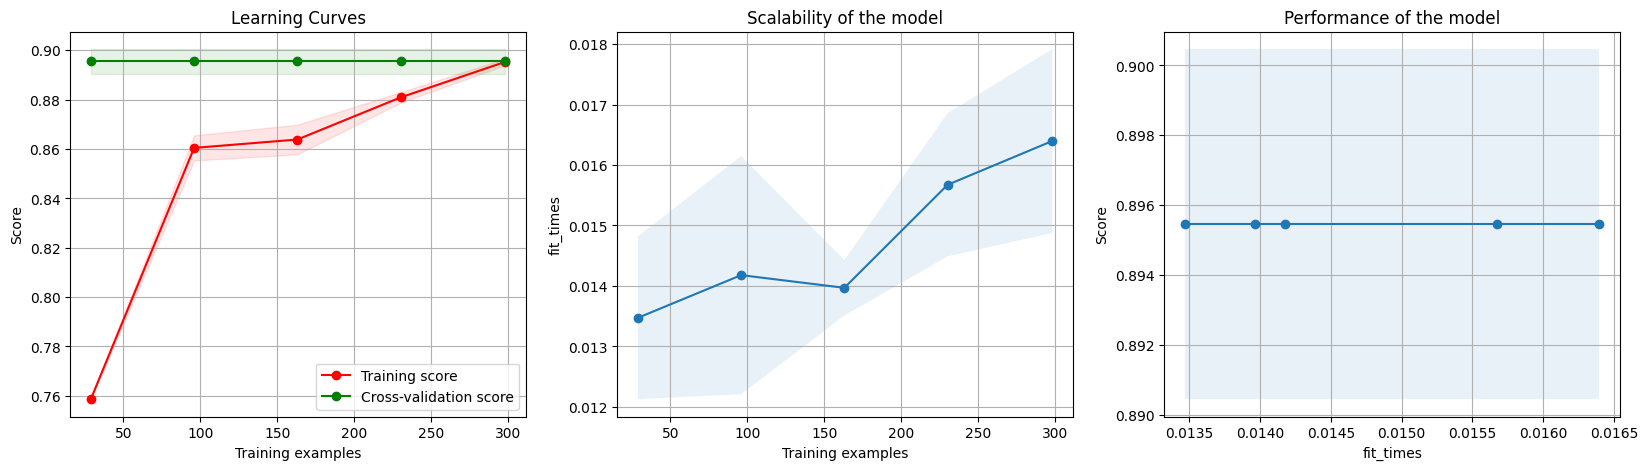

In [205]:
plot_learning_curve(best_estimator_pipeline_clf2, 'Learning Curves', X_train_features, y_train, n_jobs=-1)

In [206]:
print(best_estimator_pipeline_clf2.score(X_train_features, y_train))
print(complete_grid_pipeline_clf2.best_score_)

0.8954423592493298
0.8910993221338049


In [213]:
def final_pipeline_clf2(text):
    text_cleaned = joblib.load(file_X_train_cleaned_basic)
    features, feature_names = featurizer.fit_transform(text_cleaned)
    best_estimator_pipeline2_round1 = joblib.load(best_estimator_classifier2_path)
    predictions = best_estimator_pipeline2_round1.predict(features)
    return predictions

In [222]:
y_test_pred_clf2 = final_pipeline_clf2(X_test_features)

In [224]:
y_test.shape, y_test_pred_clf2.shape

((184,), (373,))

In [215]:
classification_report(y_test, y_test_pred)

ValueError: Found input variables with inconsistent numbers of samples: [184, 373]